## The Final Dataset: Adding AFINN Scores & Comparing to VADER

<h3>Environment & Options</h3>

In [24]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [25]:
%matplotlib inline

In [26]:
pd.set_option('display.max_colwidth', -1)

In [27]:
sns.set_palette("pastel")

<h3>Import & View Data</h3>

In [64]:
#Main Dataset
df = pd.read_csv('20190406_AM_Data.csv')

In [78]:
#Group author and tweet variables together in the dataset.
df = df.sort_index(axis=1)

In [66]:
#AFINN Scores
tweetSentiment_afinn = pd.read_csv('20190410_AM_AFINN.csv')
tweetSentiment_afinn[0:1]

,Unnamed: 0,tweetID,tweetSentiment,score
0,1,0,-0.9403,-6


In [67]:
#Drop extra index row
tweetSentiment_afinn = tweetSentiment_afinn.drop(["Unnamed: 0"], axis=1)
tweetSentiment_afinn[0:9]

,tweetID,tweetSentiment,score
0,0,-0.9403,-6
1,1,-0.3612,-2
2,2,0.6908,5
3,3,-0.1531,-2
4,4,-0.8316,-9
5,5,-0.9403,-6
6,6,0.1573,3
7,7,0.0000,0
8,8,0.7579,5


In [68]:
#Add AFINN data to main dataset
df['tweetSentiment_Afinn'] = tweetSentiment_afinn['score']

In [79]:
#Window into current state of the dataaset
df[:-10]

,authorFollower,authorFriend,authorID,authorID_original,authorLang,authorLang_new,authorLocation,authorLocation_new,authorPicture,authorPicture_new,...,tweetMethod,tweetMethod_new,tweetSentiment,tweetSentimentSt,tweetSentiment_Afinn,tweetSentiment_AfinnSt,tweetSentiment_cat,tweetText,tweetTimeDate,tweetURL
0,197,579.0,5.642576e+08,NaN,en,English,NaN,NaN,http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png,Default,...,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Web_Standard,-0.9403,-1.477463,-6,-1.865053,Very Negative,"RT @ezralevant: Abdul Habash, a Syrian migrant to Canada, made a terrifying bomb threat against Jason Kenney. He and his dad told our reporter it’s no big deal — in fact, they’re mad the cops won’t give him his computer and phone back. #terrorists https://t.co/AujC0eU4Sk",Mon Mar 04 23:59:47 +0000 2019,http://twitter.com/darleneclarke5/statuses/1102720324875894785
1,940,225.0,3.109106e+09,NaN,en,English,top your momma,Not USA,http://pbs.twimg.com/profile_images/1062099415421411333/EZCmOCeu_normal.jpg,Personalized,...,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",Smartphone,-0.3612,-0.363744,-2,-0.396826,Negative,RT @1776Stonewall: https://t.co/CyucESMlFM Texas health officials report that nearly 200 people contracted mumps in migrant detention facilities located across the state so far this fiscal year.,Mon Mar 04 23:59:40 +0000 2019,http://twitter.com/BlueelvisEric/statuses/1102720294035353606
2,103,275.0,1.083790e+18,NaN,en,English,NaN,NaN,http://pbs.twimg.com/profile_images/1083792878655045632/zQMarxaz_normal.jpg,Personalized,...,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",Web_Lite,0.6908,1.659452,5,2.172572,Positive,"RT @EmeraldRobinson: Trump's base was promised a border wall, and the end of chain migration and birthright citizenship. People inside the administration who think they can pass amnesty bills and still win 2020 are playing with fire. https://t.co/36Fc7dxpNY",Mon Mar 04 23:59:38 +0000 2019,http://twitter.com/Potus16Abe/statuses/1102720285478928384
3,718,869.0,7.967720e+17,NaN,en,English,NaN,NaN,http://pbs.twimg.com/profile_images/1061628259761352707/45jSYb3T_normal.jpg,Personalized,...,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",Smartphone,-0.1531,0.036472,-2,-0.396826,Negative,RT @AnjaKolibri: Australian humpback #whale population has recovered from near- #extinction linked to #hunting but new Queensland research warns that numbers could soon fall again due to the effects of #climate change: https://t.co/xGrouWcuNz … … … … … via @ABCNews,Mon Mar 04 23:59:34 +0000 2019,http://twitter.com/soozbo/statuses/1102720268726951937
4,666,481.0,1.056307e+08,NaN,en,English,Netherlands,Not USA,http://pbs.twimg.com/profile_images/378800000757810411/851d42a8b7e7efd00eded4d6efff5587_normal.jpeg,Personalized,...,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Smartphone,-0.8316,-1.268413,-9,-2.966223,Very Negative,"RT @NinaDSchick: In what should come as no surprise, the Kremlin is actively promoting disruption &amp; chaos in Europe's neighbourhood (as in Syria ahead of the migration crisis of 2015), to undermine the EU, especially on the issue of migrants/refugees.",Mon Mar 04 23:59:32 +0000 2019,http://twitter.com/jp_dutch/statuses/1102720262670290945
5,125,232.0,1.078316e+09,NaN,en,English,NaN,NaN,http://pbs.twimg.com/profile_images/696140281092141057/8PzKc_uT_normal.jpg,Personalized,...,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Web_Standard,-0.9403,-1.477463,-6,-1.865053,Very Negative,"RT @ezralevant: Abdul Habash, a Syrian migrant to Canada, made a terrifying bomb threat against Jason Kenney. He and his dad told our reporter it’s no big deal — in fact, they’re mad the cops won’t give him his computer and phone back. #terrorists https://t.co/AujC0eU4Sk",Mon Mar 

<h3>Compare VADER and AFINN scores</h3>

In [80]:
#Write dataset to file for Dropbox
df.to_csv("20190410_AM_Data.csv", index=False)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


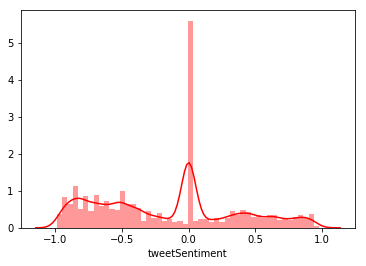

In [73]:
# plot Vader
p1=sns.distplot(df['tweetSentiment'], color="r")
#sns.plt.show()


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


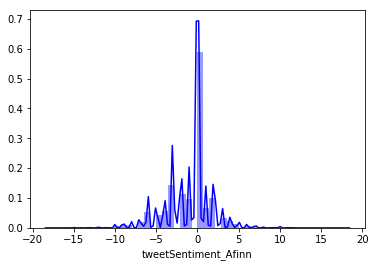

In [74]:
#plot AFINN
p1=sns.distplot(df['tweetSentiment_Afinn'], color="b")

In [62]:
#standardize variables to get them on the same scale so they can be plotted together
scaler = StandardScaler()

In [75]:
#Create new columns for standardized scores
df['tweetSentimentSt'] = df['tweetSentiment']
df['tweetSentiment_AfinnSt'] = df['tweetSentiment_Afinn']

In [76]:
#Calculate standardized scores and place these in the new columns
df[['tweetSentimentSt', 'tweetSentiment_AfinnSt']] = StandardScaler().fit_transform(df[['tweetSentiment', 'tweetSentiment_Afinn']])

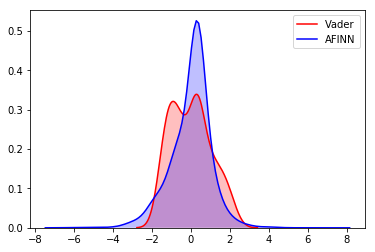

In [77]:
#Show standardized scores on one density plot
p1=sns.kdeplot(df['tweetSentimentSt'], bw=.4, shade=True, color="r", label="Vader")
p1=sns.kdeplot(df['tweetSentiment_AfinnSt'], bw= .4, shade=True, color="b", label="AFINN").legend()